# Dataset : bioinf.nl/~davelangers/datasets/quickdraw.zip

In [2]:
import quickdraw

In [33]:
?quickdraw.load_data

In [34]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

In [35]:
x_train.shape,x_train.dtype

((60000, 28, 28), dtype('uint8'))

In [36]:
y_train.shape, y_train.dtype

((60000,), dtype('uint8'))

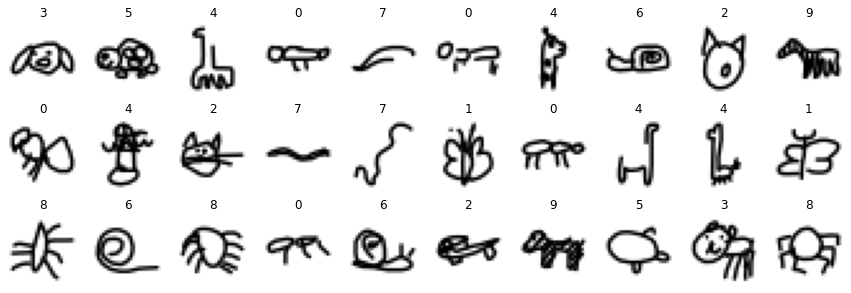

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_train[img], cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(y_train[img])
plt.show()

In [38]:
x_train = x_train.astype(float).reshape(-1, 28*28) / 255.0
x_test = x_test.astype(float).reshape(-1, 28*28) / 255.0

In [39]:
x_train


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_test.shape, y_test.dtype

((10000,), dtype('uint8'))

In [11]:
y_test[:10]

array([8, 1, 9, 2, 6, 2, 2, 9, 4, 2], dtype=uint8)

In [12]:

from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
y_test[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
# Deep learning 

# create model
#overfitting
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28,28,), name='Input'))
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1'))
neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2'))
neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               65664     
_________________________________________________________________
Hidden_3 (Dense)             (None, 32)                4128      
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


2022-06-21 15:44:08.636305: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-06-21 15:44:08.660712: I tensorflow/core/platform/profile_utils/cpu_utils.cc:104] CPU Frequency: 2199995000 Hz
2022-06-21 15:44:08.662417: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5622b597ecb0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-06-21 15:44:08.662469: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


In [15]:
# Deep learning 

# create model
# try dropout method to make it better
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28,28,), name='Input'))
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1'))
neural.add(keras.layers.Dropout(0.3))   #use dropout to regularization
neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2'))
neural.add(keras.layers.Dropout(0.2))   #use dropout to regularization
neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
Hidden_3 (Dense)             (None, 32)                4128      
_________________________________________________________________
Output (Dense)               (None, 10)               

In [16]:
# Deep learning 

# create model
# try L1/L2 regularization method to make it better
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28,28,), name='Input'))
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=512, activation='tanh', name='Hidden_1',
                                kernel_regularizer=keras.regularizers.l2(1e-4)))
neural.add(keras.layers.Dense(units=128, activation='tanh', name='Hidden_2',
                                kernel_regularizer=keras.regularizers.l2(1e-4)))
neural.add(keras.layers.Dense(units=32, activation='tanh', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 512)               401920    
_________________________________________________________________
Hidden_2 (Dense)             (None, 128)               65664     
_________________________________________________________________
Hidden_3 (Dense)             (None, 32)                4128      
_________________________________________________________________
Output (Dense)               (None, 10)                330       
Total params: 472,042
Trainable params: 472,042
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Deep learning 

# create model
# Convolution
neural = keras.models.Sequential()

neural.add(keras.layers.InputLayer(input_shape=(28,28,), name='Input'))
neural.add(keras.layers.Flatten())
neural.add(keras.layers.Dense(units=256, activation='tanh', name='Hidden_1'))
neural.add(keras.layers.Dense(units=64, activation='tanh', name='Hidden_2'))
neural.add(keras.layers.Dense(units=16, activation='tanh', name='Hidden_3'))
neural.add(keras.layers.Dense(units=10, activation='softmax', name='Output'))

neural.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
Hidden_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
Hidden_2 (Dense)             (None, 64)                16448     
_________________________________________________________________
Hidden_3 (Dense)             (None, 16)                1040      
_________________________________________________________________
Output (Dense)               (None, 10)                170       
Total params: 218,618
Trainable params: 218,618
Non-trainable params: 0
_________________________________________________________________


In [18]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/6
600/600 [==============================] - 2s 3ms/step - loss: 1.3426 - categorical_accuracy: 0.5663 - val_loss: 1.1212 - val_categorical_accuracy: 0.6403
Epoch 2/6
600/600 [==============================] - 2s 3ms/step - loss: 1.0206 - categorical_accuracy: 0.6718 - val_loss: 0.9636 - val_categorical_accuracy: 0.6896
Epoch 3/6
600/600 [==============================] - 2s 3ms/step - loss: 0.8877 - categorical_accuracy: 0.7146 - val_loss: 0.9087 - val_categorical_accuracy: 0.7097
Epoch 4/6
600/600 [==============================] - 2s 3ms/step - loss: 0.7943 - categorical_accuracy: 0.7463 - val_loss: 0.8735 - val_categorical_accuracy: 0.7209
Epoch 5/6
600/600 [==============================] - 2s 3ms/step - loss: 0.7223 - categorical_accuracy: 0.7678 - val_loss: 0.8379 - val_categorical_accuracy: 0.7341
Epoch 6/6
600/600 [==============================] - 2s 3ms/step - loss: 0.6600 - categorical_accuracy: 0.7884 - val_loss: 0.8257 - val_categorical_accuracy: 0.7416


In [19]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

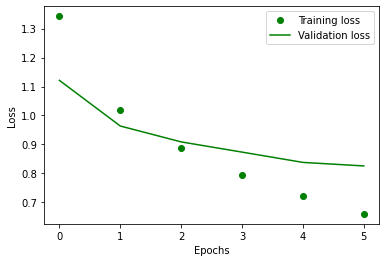

In [20]:
plt.plot(history.history['loss'], 'go', label='Training loss')
plt.plot(history.history['val_loss'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

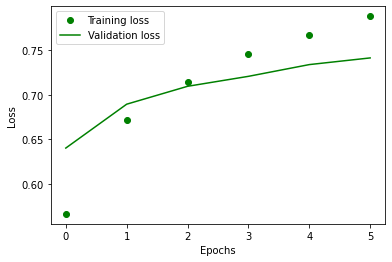

In [21]:
plt.plot(history.history['categorical_accuracy'], 'go', label='Training loss')
plt.plot(history.history['val_categorical_accuracy'], 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
import numpy as np

yhat_test = neural.predict(x_test)
label_test = np.argmax(yhat_test, axis=1)
label_test

array([8, 1, 9, ..., 3, 6, 5])

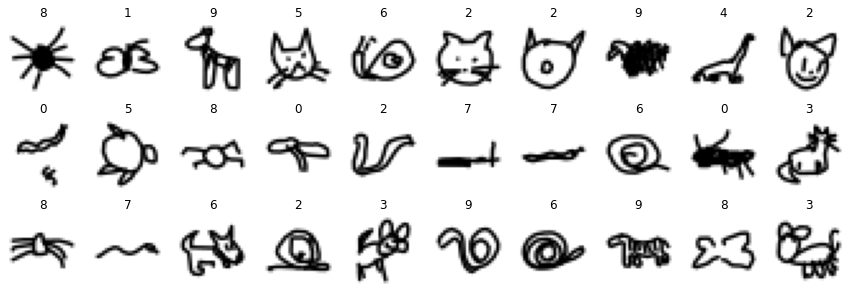

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))
for img in range(30):
    plt.subplot(3, 10, img+1)
    plt.imshow(x_test[img].reshape((28, 28)), cmap=plt.cm.binary)
    plt.axis(False)
    plt.title(str(label_test[img]))
plt.show()

In [24]:
from sklearn.metrics import confusion_matrix

conmat = confusion_matrix(np.argmax(y_test, axis=1), label_test)
conmat

array([[736,  19,  25,  49,  12,  10,  12,  32,  63,  24],
       [ 28, 894,  21,  18,   0,   8,  12,   6,  29,   2],
       [ 54,  23, 700,  84,   6,  14,  34,  12,  39,  15],
       [136,  39, 108, 566,  11,  39,  34,  26,  37,  38],
       [ 26,   5,  11,  18, 889,   0,   1,  29,   6,   6],
       [ 70,  18,  35,  43,   2, 610,  21,  10, 130,  50],
       [ 39,  18,  40,  44,   3,  12, 750,  21,  11,  13],
       [ 47,  15,  21,  47,  40,  14,  19, 797,  16,   5],
       [ 98,  13,  36,  10,   6,  43,  11,   7, 725,  18],
       [104,   5,  24,  79,  19,  26,  26,   7,  27, 749]])

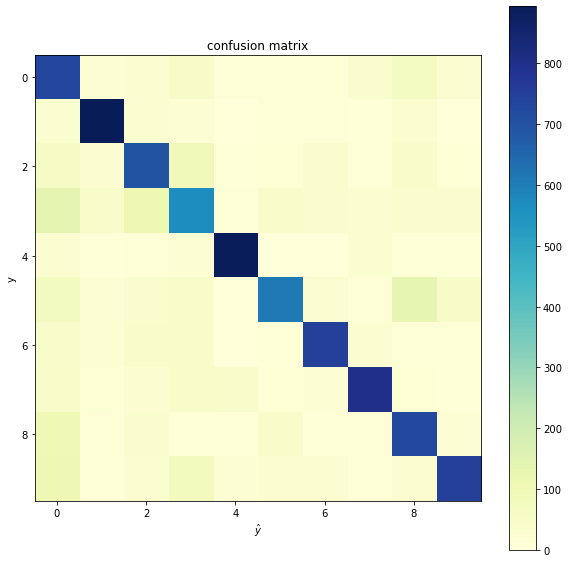

In [25]:
plt.subplots(figsize=(10, 10))
plt.imshow(conmat, cmap=plt.cm.YlGnBu, vmin=0.0)
plt.xlabel('$\hat{y}$')
plt.ylabel('y')
plt.colorbar()
plt.title('confusion matrix')
plt.show()

In [26]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

Acc: 0.742
bAcc: 0.742


In [27]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, axis=1), label_test, digits=4))

              precision    recall  f1-score   support

           0     0.5501    0.7495    0.6345       982
           1     0.8522    0.8782    0.8650      1018
           2     0.6856    0.7136    0.6993       981
           3     0.5908    0.5474    0.5683      1034
           4     0.8998    0.8971    0.8984       991
           5     0.7861    0.6168    0.6912       989
           6     0.8152    0.7886    0.8017       951
           7     0.8416    0.7806    0.8100      1021
           8     0.6694    0.7497    0.7073       967
           9     0.8141    0.7026    0.7543      1066

    accuracy                         0.7416     10000
   macro avg     0.7505    0.7424    0.7430     10000
weighted avg     0.7510    0.7416    0.7429     10000



In [29]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
neural.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = neural.fit(
    x=x_train,
    y=y_train,
    epochs=25,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test)
)

Epoch 1/25
600/600 [==============================] - 2s 3ms/step - loss: 0.6094 - categorical_accuracy: 0.8056 - val_loss: 0.8114 - val_categorical_accuracy: 0.7508
Epoch 2/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5581 - categorical_accuracy: 0.8227 - val_loss: 0.8221 - val_categorical_accuracy: 0.7413
Epoch 3/25
600/600 [==============================] - 2s 3ms/step - loss: 0.5165 - categorical_accuracy: 0.8356 - val_loss: 0.8063 - val_categorical_accuracy: 0.7474
Epoch 4/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4784 - categorical_accuracy: 0.8479 - val_loss: 0.8296 - val_categorical_accuracy: 0.7460
Epoch 5/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4424 - categorical_accuracy: 0.8601 - val_loss: 0.8690 - val_categorical_accuracy: 0.7403
Epoch 6/25
600/600 [==============================] - 2s 3ms/step - loss: 0.4109 - categorical_accuracy: 0.8690 - val_loss: 0.8608 - val_categorical_accuracy: 0.7446
Epoc

KeyboardInterrupt: 

In [ ]:
history.history.keys()

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, roc_auc_score
print(f'Acc: {accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')
print(f'bAcc: {balanced_accuracy_score(np.argmax(y_test, axis=1), label_test):.3}')

# ConvNet (keras)

In [ ]:
(x_train, y_train), (x_test, y_test) = quickdraw.load_data()

In [ ]:
x_train.shape

In [ ]:
x_train = x_train.reshape((60000,28,28,1))/255
x_test = x_test.reshape((-1,28,28,1))/255

In [ ]:
x_train.shape

In [ ]:
from tensorflow import keras
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
convnet = keras.models.Sequential()
# The original input data
convnet.add(keras.layers.InputLayer(input_shape=(28,28,1)))
# The filter
# stride is to prevent from the overlaping of the pixel, skip some position. (if 3*3 it is fine, but if it is 10*10 the overlaping quite a lot)
# 24 -- > 28 - 5 + 1 ; 32 -- > filter
# padding --> same will not lose 
convnet.add(keras.layers.Conv2D(filters = 32, strides= (1,1),kernel_size=(5, 5),activation =keras.activations.tanh))



convnet.summary()

In [ ]:
convnet = keras.models.Sequential()
# The original input data
convnet.add(keras.layers.InputLayer(input_shape=(28,28,1)))
convnet.add(keras.layers.Conv2D(filters = 32,kernel_size=(3, 3),activation =keras.activations.tanh))
# 18496 comes from 32(filter) * 9 (kernel_size) + 1(bias) times 64(filter)
convnet.add(keras.layers.Conv2D(filters = 32,kernel_size=(3, 3),activation =keras.activations.tanh))
# 12 comes from 24 / 2
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


convnet.add(keras.layers.Conv2D(filters = 64,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.Conv2D(filters = 64,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

convnet.add(keras.layers.Conv2D(filters = 128,kernel_size=(3, 3),activation =keras.activations.tanh))

convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
convnet.add(keras.layers.Flatten())
convnet.summary()

In [ ]:
convnet = keras.models.Sequential()

convnet.add(keras.layers.InputLayer(input_shape=(28,28,1)))
convnet.add(keras.layers.Conv2D(filters = 32,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.Conv2D(filters = 32,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

convnet.add(keras.layers.Conv2D(filters = 64,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.Conv2D(filters = 64,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
convnet.add(keras.layers.Conv2D(filters = 128,kernel_size=(3, 3),activation =keras.activations.tanh))
convnet.add(keras.layers.Flatten())
convnet.add(keras.layers.Dense(units=64,activation =keras.activations.tanh))
convnet.add(keras.layers.Dense(units=10,activation =keras.activations.softmax))
convnet.summary()

In [ ]:
convnet.compile(
    loss=keras.losses.CategoricalCrossentropy(),
    optimizer=keras.optimizers.RMSprop(),
    metrics=keras.metrics.CategoricalAccuracy()
)
history = convnet.fit(
    x=x_train,
    y=y_train,
    epochs=6,
    batch_size=100,
    verbose=1,
    validation_data=(x_test, y_test))

In [11]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

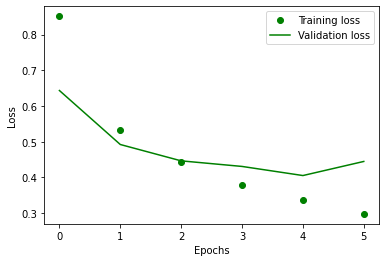

In [23]:
import matplotlib.pyplot as plt
plt.plot(loss, 'go', label='Training loss')
plt.plot(val_loss, 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [21]:
import numpy as np
loss = np.array(history.history['loss'])
val_loss= np.array(history.history['val_loss'])

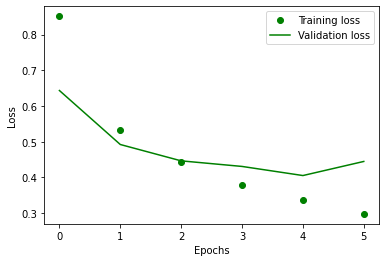

In [24]:
import matplotlib.pyplot as plt
plt.plot(loss, 'go', label='Training loss')
plt.plot(val_loss, 'g-', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()